### **Binary Logistic Regression Implementation**

**Import necessary libraries**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

**Load and Explore the Data**


In [62]:
data = pd.read_csv("Exams_Scores_and_Admission_Status.csv")

In [63]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


---


**Show Data Details**


In [64]:
data.shape

(100, 3)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam 1    100 non-null    float64
 1   Exam 2    100 non-null    float64
 2   Admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [66]:
data.isnull().sum()

Exam 1      0
Exam 2      0
Admitted    0
dtype: int64

In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Exam 1,100.0,65.644274,19.458222,30.058822,50.919511,67.032988,80.212529,99.827858
Exam 2,100.0,66.221998,18.582783,30.603263,48.179205,67.682381,79.360605,98.869436
Admitted,100.0,0.600000,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000


---


**Visualize the data**


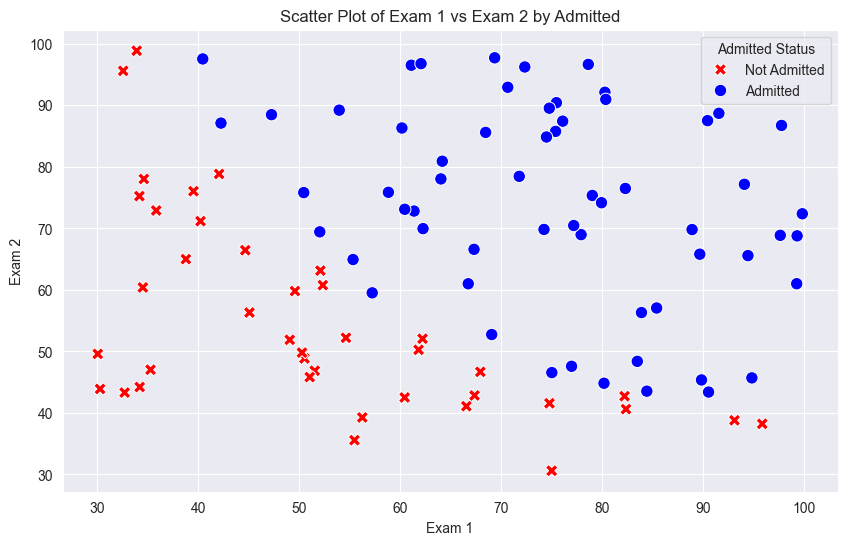

In [68]:
def plot_scatter(data, x_feature, y_feature, target):
    scatter = sns.scatterplot(
        x=x_feature,
        y=y_feature,
        data=data,
        hue=target,
        palette={0: "r", 1: "b"},
        style=target,
        markers={0: "X", 1: "o"},
        s=80,
    )

    # Extracting legend handles and labels
    handles, labels = scatter.get_legend_handles_labels()
    scatter.legend(
        handles=handles,
        labels=["Not Admitted", "Admitted"],
        title="Admitted Status",
    )

    plt.title(f"Scatter Plot of {x_feature} vs {y_feature} by {target}")


plt.figure(figsize=(10, 6))
plot_scatter(data, "Exam 1", "Exam 2", "Admitted")
plt.show()

---


**Add a new column of ones for the intercept term**


In [69]:
data.insert(0, "Ones", 1)
data.head(5)

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


---


**Prepare the feature matrix X and target vector y**


In [70]:
X = data.drop("Admitted", axis=1).values
y = data["Admitted"].values.reshape(-1, 1)

In [71]:
theta = np.zeros((1, X.shape[1]))
theta

array([[0., 0., 0.]])

---


**Sigmoid Function**
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$


In [72]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

**Plot the Sigmoid Function**


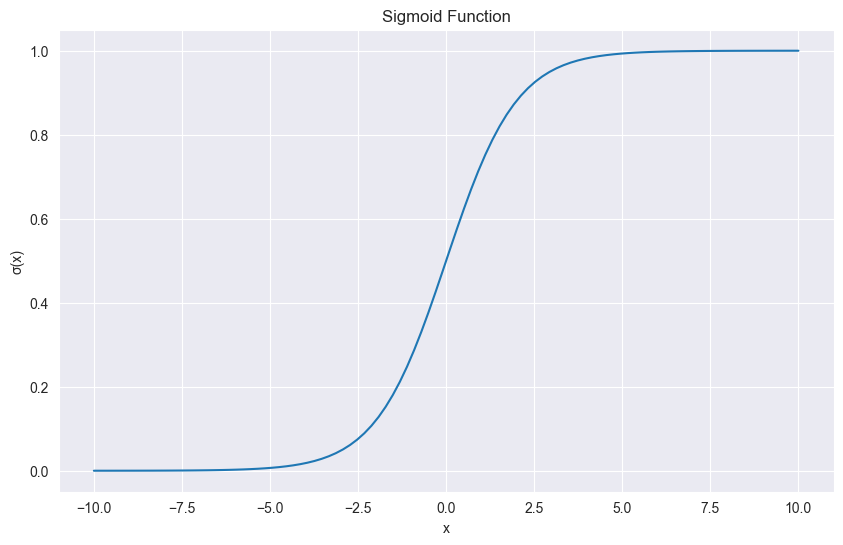

In [73]:
x_values = np.linspace(-10, 10, 100)
y_values = sigmoid(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.show()

---


**Hypothesis Function**

The hypothesis function for logistic regression using the sigmoid function.

$$h_\theta(x) = \sigma(X \theta^T) = \frac{1}{1 + e^{- X \theta^T}}$$


In [74]:
X.shape, theta.T.shape

((100, 3), (3, 1))

In [75]:
def hypothesis(theta, X):
    theta = np.matrix(theta)
    return sigmoid(X @ theta.T)

In [76]:
h_x = hypothesis(theta, X)

---


**Cost Function**

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]$$


In [77]:
y.shape, h_x.shape

((100, 1), (100, 1))

In [78]:
def cost_function(theta, X, y):
    m = len(y)
    h_x = hypothesis(theta, X)

    first_term = np.multiply(y, np.log(h_x))
    second_term = np.multiply((1 - y), np.log(1 - h_x))

    cost = -np.sum(first_term + second_term) / m
    return cost

In [79]:
# Compute initial cost
initial_cost = cost_function(theta, X, y)
print("Initial Cost:", initial_cost)

Initial Cost: 0.6931471805599453


---


**Define the gradient function**


$$\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$


In [80]:
error = hypothesis(theta, X) - y

In [81]:
error.T.shape, X.shape

((1, 100), (100, 3))

In [82]:
def gradient(theta, X, y):
    m = len(y)
    error = hypothesis(theta, X) - y
    d_theta = (error.T @ X) / m
    return d_theta

---


**Optimization**

Use an optimization algorithm to find the best parameters that minimize the cost function.


In [83]:
import scipy.optimize as opt

In [84]:
result = opt.fmin_tnc(
    func=cost_function,
    x0=theta,
    fprime=gradient,
    args=(X, y),
)
result

(array([-25.16131846,   0.20623159,   0.20147148]), 36, 0)

In [85]:
updated_theta = result[0]

In [86]:
# Compute cost after optimization
optimized_cost = cost_function(updated_theta, X, y)
print("Optimized Cost:", optimized_cost)

Optimized Cost: 0.20349770158947528


---


**Predict Output**

In [87]:
def predict(theta, X):
    probability = hypothesis(theta, X)
    return [1 if x >= 0.5 else 0 for x in probability]

In [88]:
y_pred = predict(updated_theta, X)

---


**Calculate Accuracy**


In [89]:
correct_pred = np.sum(y_pred == data["Admitted"].values)
accuracy = (correct_pred / len(y_pred)) * 100
print(f"Accuracy of y_pred: {accuracy:.2f}%")

Accuracy of y_pred: 89.00%


---


**Plot Decision Boundary**

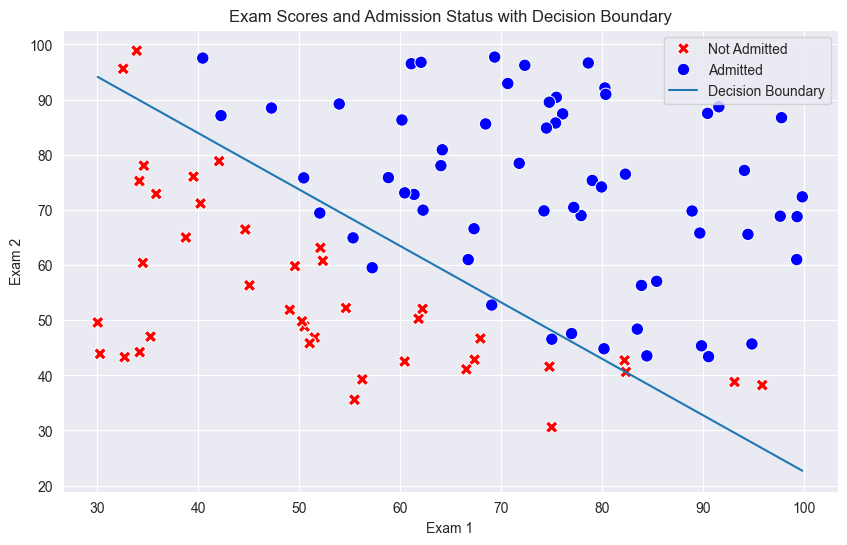

In [90]:
# Plot final graph with decision boundary
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x="Exam 1",
    y="Exam 2",
    data=data,
    hue="Admitted",
    palette={1: "b", 0: "r"},
    style="Admitted",
    markers={1: "o", 0: "X"},
    s=80,
)

# Calculate decision boundary
x_values = np.linspace(data["Exam 1"].min(), data["Exam 1"].max(), 100)
y_values = -(updated_theta[0] + updated_theta[1] * x_values) / updated_theta[2]
sns.lineplot(x=x_values, y=y_values, label=True)

plt.title("Exam Scores and Admission Status with Decision Boundary")

handles, labels = scatter.get_legend_handles_labels()
scatter.legend(
    handles=handles, labels=["Not Admitted", "Admitted", "Decision Boundary"]
)

plt.show()

---
